# CS2006 Python 2 Practical

### 170000801 and 170005146

## Introduction

Taking the hat of a data scientist, the goal of this practical was to learn how to perform data analysis using <tt>pandas</tt> and <tt>matplotlib</tt>. With the intention of gathering a deeper insight of the users of GitHub, we refined and mined responses from the 2017 GitHub Open Source Survey.

To use this notebook, please make sure to have the following dependencies installed:
<ul>
    <li>pandas (including pandas.api.types and pandas.plotting)</li>
    <li>numpy</li>
    <li>matplotlib (including matplotlib.pyplot)</li>
    <li>mpl_toolkits.mplot3d</li>
    <li>datetime</li>
    <li>collections</li>
</ul>

## A Brief Overview of Completeness with Respect to the Specifications

#### Basic Requirements

We have completed the basic requirements as follows (paraphrased from the specifications):
<ul>
    <li>Refine the data set by checking there are no duplicates or inconsistent entries.</li>
    <li>Save a new file of refined data where duplicates or inconsistencies are found.</li>
    <li>Automate and document refinement.</li>
    <li>Perform descriptive analysis of the data set: total records, questionnaires fully vs partially completed, questionnaires completed by GitHub visitors vs outside communities, how many communities were involved (and how many questionnaires were filled in by members of each community).</li>
    <li>Calculate the percentage of respondents who participated in each participation option.</li>
    <li>Build a pie chart representing the number of answers to a question that only allows a single choice, such as employment status or age.</li>
    <li>Plot a bar chart showing the percentage of respondents participating in open source projects in each of the specified ways.</li>
</ul>

#### Additional Requirements

We have completed all but the final extension, with some additional analyses of our own choosing:
<ul>
    <li>Plot the timeline of data collection.</li>
    <li>Produce two summary tables for two grid questions. Use these tables to build stacked bar charts.</li>
    <li>We have produced a third summary table and stacked bar chart set.</li>
    <li>Use the summary tables to produce unstacked 3D bar charts. Explain which visualization is more informative.</li>
    <li>We have produced a third 3D unstacked bar chart to support our third summary table and stacked bar chart.</li>
    <li>Additional analysis on the impact of employment status on a respondent's likelihood to contribute to open source development.</li>
    <li>Additional analysis on the impact of a respondent's age of first regular access to a computer with internet on their likelihood to contribute.</li>
    <li>Additional analysis on the gender and transgender identities of respondents.</li>
    <li>Additional analysis on the gender and sexual orientation of respondents.</li>
    <li>Additional analysis on the impact of formal education on a respondent's employment status.</li>
    <li>We did not have time to implement interactive visualizations for any of the above.</li>
</ul>

## Into the Data

To view the raw data in csv format, please navigate back a directory, then into the <tt>data</tt> directory. There are two files: the original raw data (<tt>data.csv</tt>) and the refined data (<tt>refined.csv</tt>). Additionally, the <tt>data</tt> directory contains a file (<tt>data_notes.txt</tt>) that describes key features of the data and a file (<tt>questionnaire.pdf</tt>) that lists the questions prompting the data collected.

In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_datetime64_any_dtype
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from verification import *

## Refining and Verifying the Dataset

First, let's take a look at the type of data produced by the survey and print the first 10 rows.

In [2]:
df = pd.read_csv("../data/survey_data.csv")
df.head(10)

,RESPONSE.ID,DATE.SUBMITTED,STATUS,PARTICIPATION.TYPE.FOLLOW,PARTICIPATION.TYPE.USE.APPLICATIONS,PARTICIPATION.TYPE.USE.DEPENDENCIES,PARTICIPATION.TYPE.CONTRIBUTE,PARTICIPATION.TYPE.OTHER,CONTRIBUTOR.TYPE.CONTRIBUTE.CODE,CONTRIBUTOR.TYPE.CONTRIBUTE.DOCS,...,WRITTEN.ENGLISH,AGE,FORMAL.EDUCATION,PARENTS.FORMAL.EDUCATION,AGE.AT.FIRST.COMPUTER.INTERNET,LOCATION.OF.FIRST.COMPUTER.INTERNET,PARTICIPATION.TYPE.ANY.REPONSE,POPULATION,OFF.SITE.ID,TRANSLATED
0,45,3/21/17 14:56,Partial,1,1,1,1,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,github,NaN,0
1,46,3/21/17 15:30,Partial,1,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,github,NaN,0
2,47,3/21/17 15:19,Partial,1,1,1,1,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,github,NaN,0
3,48,3/21/17 15:42,Complete,1,1,1,1,0,Frequently,Rarely,...,Very well,35 to 44 years,Bachelor's degree,Bachelor's degree,13 - 17 years old,At home (belonging to me or a family member),1,github,NaN,0
4,49,3/21/17 15:38,Complete,1,1,1,1,0,Occasionally,Rarely,...,Very well,17 or younger,Secondary (high) school graduate or equivalent,Master's degree,Younger than 13 years old,At home (belonging to me or a family member),1,github,NaN,0
5,50,3/21/17 15:34,Partial,0,1,1,1,0,Rarely,Never,...,NaN,NaN,NaN,NaN,NaN,NaN,1,github,NaN,0
6,51,3/21/17 15:41,Complete,1,1,1,0,0,NaN,NaN,...,Very well,35 to 44 years,Vocational/trade program or apprenticeship,Bachelor's degree,13 - 17 years old,At home (belonging to me or a family member),1,github,NaN,0
7,52,3/21/17 16:00,Complete,1,1,1,1,1,Frequently,Frequently,...,Very well,25 to 34 years,Master's degree,Bachelor's degree,Younger than 13 years old,At home (belonging to me or a family member),1,github,NaN,0
8,53,3/21/17 15:41,Partial,1,1,1,1,0,Rarely,Never,...,NaN,NaN,NaN,NaN,NaN,NaN,1,github,NaN,0
9,55,3/21/17 16:12,Complete,1,1,1,1,0,Frequently,Rarely,...,Very well,18 to 24 years,Secondary (high) school graduate or equivalent,Doctorate (Ph.D.) or other advanced degree (e....,13 - 17 years old,At home (belonging to me or a family member),1,github,NaN,0


The data set is readable and non-corrupted; therefore, it passes the first stage of refinement.

Comparing what we know from the <tt>questionnaire.txt</tt> file to what is shown above, it is clear that some questions consume more than a single column: there are 52 questions but 93 columns. Additionally, most columns in the dataframe appear to be either an integer (RESPONSE.ID; 0 or 1 for PARTICIPATION.TYPE.... questions and TRANSLATED) or an object (for dates or strings). These attributes will be more closely investigated later, once the data is refined.

To get an idea of how complete the data set is, let's calculate the percentage of cells that are <tt>NaN</tt>, or Not a Number. To do so, a <tt>percentage</tt> function has been provided below.

In [3]:
def percentage(part, whole):
    ans = (part/whole) * 100
    return ans

In [4]:
cell_count = df.size
print("Total cells: {}.".format(cell_count))

nanDF = df.isna().sum()
nans = 0
for item in nanDF:
    nans += item
    
print("Null cells: ", nans, ", accounting for {0:.2f}% of the data.".format(percentage(nans, cell_count)))

Total cells: 560697.
Null cells:  186041 , accounting for 33.18% of the data.


From the above calculation, it is evident that the data set is approximately 2/3 complete. If there is any invalid data in the set, this percentage will grow in the refinement process as illegal answers (where a question that should have been hidden was answered) and invalid answers (where the answer that was recorded is not one of the choices) will be overwritten to <tt>NaN</tt>. This will be discussed in more detail once the data is at the third level of control.

To refine the data, the first step is to check if there are any duplicates. While at first glance it may seem arbitrary to check the whole dataframe (as opposed to simply the RESPONSE.ID column) for duplicates, this subtle difference is significant. If there was an error where two separate responses received the same ID, checking only the ID column could result in dropping relevant data. As the <tt>drop_duplicates</tt> function is relatively quick, it is worth checking the whole frame.

While this set of survey data does not contain duplicates, to improve reusability, the below test also includes a print statement to inform the percentage of the original dataset that has been removed, if any. To calculate the percent, the <tt>percentage</tt> function above is reused.

In [5]:
sizeBefore = len(df)
df = df.drop_duplicates()

size = len(df)
diff = sizeBefore - size

if diff > 0:     
    print("{} duplicates, accounting for {}% of the data have been removed.".format(diff, percentage(diff, size)))

else: 
    print("No duplicates found.")
    
print("{} records remain.".format(size))

No duplicates found.
6029 records remain.


Next, it is necessary to assert that each column contains only the expected type and that this type fits the schema defined in <tt>questionnaire</tt>. This ensures no invalid responses are used in the analyses later on. First, let's examine the types of each columns (<tt>dtypes</tt>) and how many non-null entries are in each column (<tt>info</tt>).

In [6]:
df.dtypes

RESPONSE.ID                                          int64
DATE.SUBMITTED                                      object
STATUS                                              object
PARTICIPATION.TYPE.FOLLOW                            int64
PARTICIPATION.TYPE.USE.APPLICATIONS                  int64
PARTICIPATION.TYPE.USE.DEPENDENCIES                  int64
PARTICIPATION.TYPE.CONTRIBUTE                        int64
PARTICIPATION.TYPE.OTHER                             int64
CONTRIBUTOR.TYPE.CONTRIBUTE.CODE                    object
CONTRIBUTOR.TYPE.CONTRIBUTE.DOCS                    object
CONTRIBUTOR.TYPE.PROJECT.MAINTENANCE                object
CONTRIBUTOR.TYPE.FILE.BUGS                          object
CONTRIBUTOR.TYPE.FEATURE.REQUESTS                   object
CONTRIBUTOR.TYPE.COMMUNITY.ADMIN                    object
EMPLOYMENT.STATUS                                   object
PROFESSIONAL.SOFTWARE                               object
FUTURE.CONTRIBUTION.INTEREST                        obje

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6029 entries, 0 to 6028
Data columns (total 93 columns):
RESPONSE.ID                                          6029 non-null int64
DATE.SUBMITTED                                       6029 non-null object
STATUS                                               6029 non-null object
PARTICIPATION.TYPE.FOLLOW                            6029 non-null int64
PARTICIPATION.TYPE.USE.APPLICATIONS                  6029 non-null int64
PARTICIPATION.TYPE.USE.DEPENDENCIES                  6029 non-null int64
PARTICIPATION.TYPE.CONTRIBUTE                        6029 non-null int64
PARTICIPATION.TYPE.OTHER                             6029 non-null int64
CONTRIBUTOR.TYPE.CONTRIBUTE.CODE                     4033 non-null object
CONTRIBUTOR.TYPE.CONTRIBUTE.DOCS                     4000 non-null object
CONTRIBUTOR.TYPE.PROJECT.MAINTENANCE                 4004 non-null object
CONTRIBUTOR.TYPE.FILE.BUGS                           4014 non-null object
CONTRIBUTOR

Examining the truncated result from <tt>df.dtypes()</tt>, it is clear that more rigorous verification is necesary. The print out of <tt>df.info()</tt> does indicate that all 8 numerical columns have been correctly identified (view <tt>numerical_cols</tt> in <tt>verification.py</tt> to see the full list). Unfortunately, it does not identify <tt>DATE.SUBMITTED</tt> as a datetime64 type. This means that it will be necessary to coerce this column into the appropriate date type.

Additionally, <tt>info</tt> gives insight into the number of valid answers given for particular questions through the non-null counter. This information will be more relevant in the later refinement step involving checking question dependencies (ie. that questions marked as "hidden" are only answered if certain conditions are met).

The file <tt>verification.py</tt> contains three functions to assist coercing data into the expected type. Additionally, this file contains the schema-defined lists of expected and acceptable values for each column. Please view <tt>verification.py</tt> to see these lists or for more details.

First, using <tt>enforce_col_types</tt>, columns are checked to contain the appropriate data type. If a column does not match the expected type, it is converted to NaN. For this survey, there are 8 columns that should contain integers, 1 column of dates and the remaining columns should be strings. This function will return a boolean value indicating if these conditions are met. If any fail, an error message is printed which indicates which type was not correctly matched. Where a column fails, it is necessary to refine the data of the column, and rerun the <tt>enforce_col_types</tt> function.

In [8]:
df = enforce_col_types(df)

Finished enforcing column types.


Please note that sometimes the above function call takes several minutes to complete. Feel free to make a coffee; the kernel should be finished by the time you return.

For more details on what this function does, please look at the comments in <tt>verification.py</tt>. Now that types have been enforced, let's print the dataframe again:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6029 entries, 0 to 6028
Data columns (total 93 columns):
RESPONSE.ID                                          6029 non-null int64
DATE.SUBMITTED                                       6029 non-null datetime64[ns]
STATUS                                               6029 non-null object
PARTICIPATION.TYPE.FOLLOW                            6029 non-null int64
PARTICIPATION.TYPE.USE.APPLICATIONS                  6029 non-null int64
PARTICIPATION.TYPE.USE.DEPENDENCIES                  6029 non-null int64
PARTICIPATION.TYPE.CONTRIBUTE                        6029 non-null int64
PARTICIPATION.TYPE.OTHER                             6029 non-null int64
CONTRIBUTOR.TYPE.CONTRIBUTE.CODE                     4033 non-null object
CONTRIBUTOR.TYPE.CONTRIBUTE.DOCS                     4000 non-null object
CONTRIBUTOR.TYPE.PROJECT.MAINTENANCE                 4004 non-null object
CONTRIBUTOR.TYPE.FILE.BUGS                           4014 non-null object
CON

The dataframe now has datetime64, int64 and object types in the appropriate columns. Let's check again how many <tt>nan</tt> values there are across the dataframe to see if enforcing type has generated or corrected any <tt>nan</tt> values. 

In [10]:
nanDF_after_type = df.isna().sum()
nan_after_type = 0

for item in nanDF_after_type:
    nan_after_type += item
    
print("{} nulls before enforcing type.".format(nans))
print("{} nulls after enforcing type.".format(nan_after_type))
if nans > nan_after_type:
    print(nans - nan_after_type,"nulls corrected by enforcing type, accounting for {0:.2f}% of previously null data.".format(percentage((nans - nan_after_type), nans)))
else:
    print(nan_after_type - nans,"nulls generated by enforcing type, increasing previously null data by {0:.2f}%.".format(percentage((nan_after_type - nans), nans)))

186041 nulls before enforcing type.
186041 nulls after enforcing type.
0 nulls generated by enforcing type, increasing previously null data by 0.00%.


The above calculation demonstrates that the data set passed in is unusually clean. If there were non-compliant values in a given column, type-coercion would force the invalid values to <tt>NaN</tt>. This would cause an increase in the <tt>NaN</tt> count.

Notably, the <tt>enforce_col_types</tt> function also fills empty cells with <tt>NaN</tt>. Since in the survey it is not possible to answer a question "incorrectly" (no free-response questions have been included in the survey data), it is safe to fill empty responses with <tt>nan</tt>. Additionally, this will make later analysis preparation simpler, as the <tt>dropna</tt> function will be able to ignore all ineligible responses in a column. At this point, the data has been controlled to the second degree: type has been enforced and verified.

Next, let's get the data to the third level of control, where variables have only admissable values (or <tt>nan</tt>). To do so there are several options:

<ul>
    <li><tt>contains_acceptable_values(df, ALL)</tt></li>
    <li><tt>contains_acceptable_values(df, col_name)</tt></li>
    <li><tt>check_column(df, col_name, accepted_values)</tt></li>
</ul>

To simply run the test across the whole dataframe, the <tt>contains_acceptable_values</tt> function can be called with the second parameter, <tt>col_name</tt>, specified as <tt>"all"</tt> or <tt>"ALL"</tt>. Alternatively, if only an individual column needs to be checked, <tt>contains_acceptable_values</tt> can be called with the name of the column. Lastly, if a column needs to be checked against a list of values that aren't necessarily the expected responses, it is possible to directly call the helper function <tt>check_column</tt> with the specified list as the third parameter.

When run, all of the above functions will return the number of entries that do not have a match in the <tt>accepted_values</tt> list. Ideally, this should be zero. Please note that this function ignores <tt>nan</tt> values, as these are used as placeholders to maintain the integrity of the rows. If an non-matching value is encountered, the location and unknown value is printed to allow examination and to help with further refinement. These print outs can then be used to help decide if the list of admissable values should be expanded or not. 

In [11]:
# Check the whole dataframe for simplicity
contains_acceptable_values(df, "ALL")

Invalid values encountered:
    36 occurrences of "65 years or older"
Summary: 36 errors across ALL


When first testing this function, the following "non-compliant" values were found:

<ul>
    <li><tt>Bachelor's degree</tt> instead of <tt>Bachelor\D5s degree</tt> as the questionnaire implied the reponse would be</li>
    <li><tt>Master's degree</tt> instead of <tt>Masters\D5 degree</tt> as the questionnaire implied the reponse would be</li>
    <li><tt>65 years or older</tt> was not originally listed as an admissable value for <tt>AGE</tt></li>
    <li><tt>Introductions to other people.</tt> in addition to <tt>Introductions to other people</tt> (note the period at the end)</li>
    <li><tt>Non-binary  or Other</tt> instead of <tt>Non-binary or Other</tt> (note the extra space before <tt>or</tt>)</li>
    <li><tt>I take precautions to use different usernames  in different projects.</tt> in addition to <tt>I take precautions to use different usernames in different projects.</tt> (note the extra space after <tt>usernames</tt>)</li>
    <li><tt>...pseudonym that is not linked anywhere with my real name online. </tt> in addition to <tt>...pseudonym that is not linked anywhere with my real name online.</tt> (note the extra space at the end)</li>
</ul>

<tt>Bachelor\D5s degree</tt> and <tt>Masters\D5 degree</tt> were likely caused by copying the original format of the questionnaire into a text file. The accepted values lists for <tt>PARENTS-FORMAL-EDUCATION</tt> and <tt>FORMAL-EDUCATION</tt> reflect this and now accept an apostrophe in place of <tt>\D5</tt>.

It was more difficult to decide how to handle the unexpected value of <tt>65 years or older</tt>. While not an option for the question, this answer makes logical sense for the question. However, this response branches between the accepted <tt>65 to 74 years</tt> and <tt>75 years or older</tt> options. Because it is not possible to sort this value into one subgroup or another, this value has not been added to the list of admissable values.

The last several values listed are "near-valid" reponses, where the only difference may be spacing or punctuation. As these values are very close to the an expected value, they have been added to the acceped values list. 

With more time, I would have liked to have developed an algorithm to check values not listed in the expected list to see if they are a near match to a valid value. If so, I would have liked to have been able to reclassify them as the admissable value, instead of creating a separate category. While maintaining a separate category does offer some insight (how many respondents answered the question before the survey changed form, or how many records were impacted in copying errors), merging these near-valid answers may be more insightful.

At this point if any errors remain that should not be added to the admissable values lists, it is time to clean them by setting them to <tt>NaN</tt>. The function <tt>clean_values</tt> does this by comparing all values of a given column against a list of accepted values. If the column entry is not an accepted value, then it is set to <tt>NaN</tt>.

In [12]:
df = clean_values(df, "ALL")
df.head(10)

Cleaning of ALL has completed.


,RESPONSE.ID,DATE.SUBMITTED,STATUS,PARTICIPATION.TYPE.FOLLOW,PARTICIPATION.TYPE.USE.APPLICATIONS,PARTICIPATION.TYPE.USE.DEPENDENCIES,PARTICIPATION.TYPE.CONTRIBUTE,PARTICIPATION.TYPE.OTHER,CONTRIBUTOR.TYPE.CONTRIBUTE.CODE,CONTRIBUTOR.TYPE.CONTRIBUTE.DOCS,...,AGE,FORMAL.EDUCATION,PARENTS.FORMAL.EDUCATION,AGE.AT.FIRST.COMPUTER.INTERNET,LOCATION.OF.FIRST.COMPUTER.INTERNET,PARTICIPATION.TYPE.ANY.REPONSE,POPULATION,OFF.SITE.ID,TRANSLATED,ALL
0,45,2017-03-21 14:56:00,Partial,1,1,1,1,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,github,NaN,0,0
1,46,2017-03-21 15:30:00,Partial,1,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,github,NaN,0,0
2,47,2017-03-21 15:19:00,Partial,1,1,1,1,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,github,NaN,0,0
3,48,2017-03-21 15:42:00,Complete,1,1,1,1,0,Frequently,Rarely,...,35 to 44 years,Bachelor's degree,Bachelor's degree,13 - 17 years old,At home (belonging to me or a family member),1,github,NaN,0,0
4,49,2017-03-21 15:38:00,Complete,1,1,1,1,0,Occasionally,Rarely,...,17 or younger,Secondary (high) school graduate or equivalent,Master's degree,Younger than 13 years old,At home (belonging to me or a family member),1,github,NaN,0,0
5,50,2017-03-21 15:34:00,Partial,0,1,1,1,0,Rarely,Never,...,NaN,NaN,NaN,NaN,NaN,1,github,NaN,0,0
6,51,2017-03-21 15:41:00,Complete,1,1,1,0,0,NaN,NaN,...,35 to 44 years,Vocational/trade program or apprenticeship,Bachelor's degree,13 - 17 years old,At home (belonging to me or a family member),1,github,NaN,0,0
7,52,2017-03-21 16:00:00,Complete,1,1,1,1,1,Frequently,Frequently,...,25 to 34 years,Master's degree,Bachelor's degree,Younger than 13 years old,At home (belonging to me or a family member),1,github,NaN,0,0
8,53,2017-03-21 15:41:00,Partial,1,1,1,1,0,Rarely,Never,...,NaN,NaN,NaN,NaN,NaN,1,github,NaN,0,0
9,55,2017-03-21 16:12:00,Complete,1,1,1,1,0,Frequently,Rarely,...,18 to 24 years,Secondary (high) school graduate or equivalent,Doctorate (Ph.D.) or other advanced degree (e....,13 - 17 years old,At home (belonging to me or a family member),1,github,NaN,0,0


The data is now under the third level of control. By scrolling to the middle of the head of the dataframe (near the elipses), it is possible to see where the empty cells have been filled with <tt>NaN</tt>. Let's check the impact this had on the number of <tt>NaNs</tt> across the dataframe.

In [13]:
nanDF_after_clean = df.isna().sum()
nan_after_clean = 0

for item in nanDF_after_clean:
    nan_after_clean += item
    
print("{} nulls before enforcing type.".format(nan_after_type))
print("{} nulls after enforcing type.".format(nan_after_clean))
if nan_after_type > nan_after_clean:
    print("{} nulls corrected by cleaning.".format(nan_after_type - nan_after_clean))
else:
    print("{} nulls generated by cleaning.".format(nan_after_clean - nan_after_type))

186041 nulls before enforcing type.
186077 nulls after enforcing type.
36 nulls generated by cleaning.


Predictably, the 36 cells found above that contained <tt>65 years or older</tt> have been removed.

The final step of refinement, or fourth level, consists of checking the logic of the dataframe. In the context of the survey, in <tt>questionnaire.txt</tt>, a <tt>Logic</tt> tag that indicates a question should be hidden unless a specified question has a (or one of a particular set of) particular answer(s).

Across the columns there are 23 dependencies. 21 of these are listed in <tt>questionnaire.txt</tt>, so please view this document. Please note that as responses pertaining to negative encounters have been separated from <tt>survey_data. csv</tt> into <tt>negative_incidents.csv</tt>, two of these dependencies are not enforced here. The remaining two dependencies not mentioned in <tt>questionnaire.txt</tt> are as follows:

<ul>
    <li><tt>PARTICIPATION.TYPE.ANY.REPONSE</tt> can only be one if at least one of the <tt>PARTICIPATION.TYPE....</tt> columns has a value of 1.</li>
    <li><tt>OFF.SITE.ID</tt> should only have a value if the <tt>POPULATION</tt> column value is <tt>github</tt></li>
</ul>

The following function, <tt>enforce_dependencies</tt>, iterates through the list of question dependencies in order. If it finds a question that should be marked as hidden (as its dependencies are not met), it converts the cell to <tt>nan</tt>. This will allow the value the ignored through use of <tt>dropna</tt> in later analysis.

In [14]:
df = enforce_dependencies(df, "ALL")

Enforcing dependencies of ALL has completed. 51018 changes have been made.


Now, let's check that the overall change in number of null values reflects the above output.

In [15]:
nanDF_after_deps = df.isna().sum()
nan_after_deps = 0

for item in nanDF_after_deps:
    nan_after_deps += item
    
print("{} nulls before enforcing dependencies.".format(nan_after_clean))
print("{} nulls after enforcing dependencies.".format(nan_after_deps))
if nan_after_type > nan_after_clean:
    print("{} nulls corrected by dependency checking.".format(nan_after_clean - nan_after_deps))
else:
    print("{} nulls generated by dependency checking.".format(nan_after_deps - nan_after_clean))

186077 nulls before enforcing dependencies.
237095 nulls after enforcing dependencies.
51018 nulls generated by dependency checking.


Both values match: a total of 51018 responses that don't follow the schema result in 51018 nulls generated (approximately 9% of the data). The enforcement of the logic defined in <tt>questionnaire.txt</tt> is complete and at this point the data is under the fourth level of control. 

Let's save the refined dataset and then time for some analysis!

In [16]:
df.to_csv("../data/refined_data.csv")

## Performing and Visualizing the Descriptive Analysis

At this point, the data set has been checked for duplicates, cleaned, and fully refined. The only final step to perform before any analysis is to extract the relevant columns of data into a sub-dataframe and drop any <tt>null</tt> values in the sub-dataframe. 

### Survey Completion

The first analysis we will perform on the data concerns the completeness of the survey response. This information is given by the <tt>STATUS</tt> column.

In [17]:
# Create a new dataframe of the status column, without any nans.
status = df['STATUS'].dropna()

print("STATUS contains the following values: {}\n".format(status.unique()))
print("Column description:")
status.describe()

STATUS contains the following values: ['Partial' 'Complete']

Column description:


count         6029
unique           2
top       Complete
freq          3746
Name: STATUS, dtype: object

The above description of the dataframe shows that <tt>Partial</tt> and <tt>Complete</tt> are the only possible values to indicate the completeness of a survey. Additionally, <tt>describe</tt> determines that there are more <tt>Complete</tt> surveys than <tt>Partial</tt>. Let's calculate the value of <tt>Partial</tt> to get a more complete comparison.

In [18]:
complete = 0
partial = 0
invalid = 0

for val in status:
    if val == "Complete":
        complete += 1
    elif val == "Partial":
        partial += 1
    else:
        invalid += 1
        
print("Summary: {} Complete surveys; {} Partial surveys; {} invalid cells.".format(complete, partial, invalid))
print("{0:.2f}% of surveys are complete.".format(percentage(complete, (complete + partial))))

Summary: 3746 Complete surveys; 2283 Partial surveys; 0 invalid cells.
62.13% of surveys are complete.


The above demonstrates that the majority of respondents were willing to fill the questionnaire out to its completion, but a significant 37.87% did not answer all of the questions. This could be for one of two reasons: that the respondent simply chose not to answer certain questions, or that some questions remained hidden from that respondent. 

### Participation by Community

Next is an analysis of the populations of those who answered the survey. Let's analyse the respondents from GitHub versus those from outside communities. First, the relevant data is extracted from the dataframe (and stripped of <tt>NaN</tt> values).

In [19]:
# Create a new dataframe of the population column, without any nans.
population = df['POPULATION'].dropna()

print("POPULATION contains the following values: {}\n".format(population.unique()))
print("Column description:")
population.describe()

POPULATION contains the following values: ['github' 'off site community']

Column description:


count       6029
unique         2
top       github
freq        5495
Name: POPULATION, dtype: object

The above description of the dataframe shows that only <tt>github</tt> and <tt>off site community</tt> are possible values for the population of respondents to the survey. Additionally, <tt>describe</tt> determines that there are significantly more respondents from the <tt>github</tt> community than those from an <tt>off site community</tt>. Let's calculate the value percentage of responses for each to get a full comparison.

In [20]:
github = 0
off_site = 0
invalid = 0

for val in population:
    if val == "github":
        github += 1
    elif val == "off site community":
        off_site += 1
    else:
        invalid += 1
        
print("Summary: {} GitHub respondents; {} respondents from off site communities; {} invalid cells.".format(github, off_site, invalid))
print("{0:.2f}% of respondents are from GitHub.".format(percentage(github, (github + off_site))))

Summary: 5495 GitHub respondents; 534 respondents from off site communities; 0 invalid cells.
91.14% of respondents are from GitHub.


An overwhelming percentage of the responses came straight from the GitHub community. Let's look into those that were sourced elsewhere ascertain the number of communities involved. 

In [21]:
# Create a new dataframe of the population column, without any nans.
offsite = df['OFF.SITE.ID'].dropna()

print("OFF.SITE.ID contains the following values: {}\n".format(offsite.unique()))
print("Column description:")
offsite.describe()

OFF.SITE.ID contains the following values: ['off_site_5' 'off_site_4' 'off_site_6' 'off_site_1' 'off_site_8'
 'off_site_9' 'off_site_3' 'off_site_7' 'off_site_2']

Column description:


count            534
unique             9
top       off_site_9
freq             312
Name: OFF.SITE.ID, dtype: object

Predictably, the number (<tt>count</tt>) of respondents with an off site id matches the number of respondents who are not from the GitHub community. Additionally, <tt>unique</tt> shows that there are 9 off site communities that participated in the survey, the last of which had the most respondents of all off site communities. Let's look more closely at the different off site communities.

In [22]:
communities = []

for val in offsite:
    found = False    
    
    for item in communities:
        if item[0] == val:
            update = item[1] + 1
            communities[communities.index(item)] = (item[0], update)
            found = True
            
    if not found:
        new_comm = (val, 1)
        communities.append(new_comm)
        
print("Summary: each community has the following number of respondents.")
for name, count in communities:
    print("     {} respondents from {}".format(count, name))

Summary: each community has the following number of respondents.
     12 respondents from off_site_5
     11 respondents from off_site_4
     37 respondents from off_site_6
     2 respondents from off_site_1
     79 respondents from off_site_8
     312 respondents from off_site_9
     8 respondents from off_site_3
     67 respondents from off_site_7
     6 respondents from off_site_2


Shown above is the number of participants from off-site communities. This data shows the disparity between the amount of users from certain communities compared to others, as some communities have single digits of respondents whilst others are in the hundreds.

### Respondent Participation in Open Source Software

Now, let's look at the percentage of respondents who engage in the following activities on GitHub:

<ul>
    <li>Follow updates and discussions of open source projects</li>
    <li>Use open source applications</li>
    <li>Use open source software as dependencies in other projects</li>
    <li>Participate in open source software development (including making feature requests, filing bugs, contribution of documentation or code, project maintenance, etc.)</li>
    <li>Other</li>
</ul>

In [23]:
# getting the size of the dataframe to use when calculating the percentage of all respondents who 
# participate in a given activity
size = len(df)

In [24]:
# Users who follow updates and discussions of open source projects
part_follow = df.groupby('PARTICIPATION.TYPE.FOLLOW')
follow = percentage(len(part_follow.get_group(1)), size)

print("Users who follow open source projects: {0:.2f}%".format(follow))

Users who follow open source projects: 78.65%


In [25]:
# Users of open source applications
part_apps = df.groupby('PARTICIPATION.TYPE.USE.APPLICATIONS')
apps = percentage(len(part_apps.get_group(1)), size)

print("Users who use open source applications: {0:.2f}%".format(apps))

Users who use open source applications: 92.47%


In [26]:
# Users of open source software as dependencies in other projects
part_depen = df.groupby('PARTICIPATION.TYPE.USE.DEPENDENCIES')
depends = percentage(len(part_depen.get_group(1)), size)

print("Users who use open source software as dependencies: {0:.2f}%".format(depends))

Users who use open source software as dependencies: 84.31%


In [27]:
# Users that participate in open source software development (including making feature requests, filing bugs, 
# contribution of documentation or code, project maintenance, etc.)
part_contr = df.groupby('PARTICIPATION.TYPE.CONTRIBUTE')
participate = percentage(len(part_contr.get_group(1)), size)

print("Users who contribute to open source projects: {0:.2f}%".format(participate))

Users who contribute to open source projects: 71.44%


In [28]:
# Users who engage in other ways
part_other = df.groupby('PARTICIPATION.TYPE.OTHER')
other = percentage(len(part_other.get_group(1)), size)

print("Users who participate in other ways: {0:.2f}%".format(other))

Users who participate in other ways: 4.76%


From this data we can plot a bar chart showing the percentage of respondents that participate in each way.

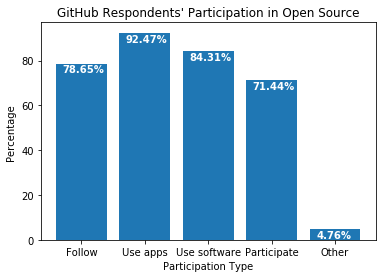

In [29]:
# Used https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#
# sphx-glr-gallery-lines-bars-and-markers-barchart-py as a reference
percents = (follow, apps, depends, participate, other)
labels = ('Follow', 'Use apps', 'Use software', 'Participate', 'Other')

x = np.arange(len(percents))
width = 0.35

fig, ax = plt.subplots()

ax.set_title('GitHub Respondents\' Participation in Open Source')
ax.set_ylabel('Percentage ')
ax.set_xlabel('Participation Type')

plt.bar(x, percents)  
plt.xticks(x, labels)

for a,b in zip(x, percents):
    plt.text(a-.3, b-4, ("{0:.2f}%".format(b)), weight='bold', color='white')

plt.show()

### Employment and Open Source Software

This section analyses and discusses the employment status of respondents. First, let's extract the data from the <tt>EMPLOYMENT.STATUS</tt> column and drop any null values.

In [30]:
# Create a new dataframe of the employment status column, dropping nans.
emp_stat = df['EMPLOYMENT.STATUS'].dropna()

print("EMPLOYMENT.STATUS contains the following values: {}\n".format(emp_stat.unique()))
print("Column description:")
emp_stat.describe()

EMPLOYMENT.STATUS contains the following values: ['Employed part time' 'Employed full time' 'Full time student'
 'Other - please describe' 'Temporarily not working'
 'Retired or permanently not working (e.g. due to disability)']

Column description:


count                   5600
unique                     6
top       Employed full time
freq                    3615
Name: EMPLOYMENT.STATUS, dtype: object

From this rudimentary analysis, it can be seen that the vast majority of respondents are employed full time. To break this down further, below is shown the numbers of respondents for each categories of employment.

In [31]:
emp_stat.value_counts()

Employed full time                                             3615
Full time student                                              1048
Employed part time                                              349
Temporarily not working                                         314
Other - please describe                                         184
Retired or permanently not working (e.g. due to disability)      90
Name: EMPLOYMENT.STATUS, dtype: int64

From this, we can get an idea of how main occupation of respondents. However, a visual representation of the data will make this comparison more visible. Let's extract the count of each employment option to use in a pie chart.

In [32]:
counts = emp_stat.value_counts()

part_time = counts['Employed part time']
full_time = counts['Employed full time']
student = counts['Full time student']
temp_unemp = counts['Temporarily not working']
perm_unemp = counts['Retired or permanently not working (e.g. due to disability)']
other = counts['Other - please describe']

Now, to generate the pie chart, run the following:

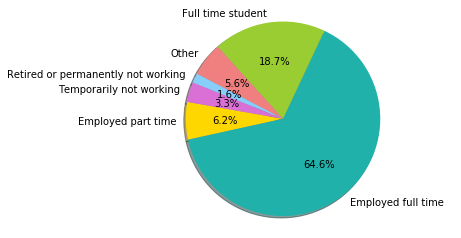

In [33]:
# Used to https://pythonspot.com/matplotlib-pie-chart/ as a reference
parts = ['Employed part time', 'Employed full time', 'Full time student',
       'Other', 'Retired or permanently not working', 'Temporarily not working']
sizes = [part_time, full_time, student, temp_unemp, perm_unemp, other]
colors = ['gold', 'lightseagreen', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orchid']
 
plt.pie(sizes, labels=parts, colors=colors, autopct='%1.1f%%', shadow=True, startangle=170)
 
plt.axis('equal')
plt.show()

With the above chart, the dominance of those employed full time is more striking. The second largest group, students, is also comparably dominant as it is larger than all the remaining categories together (employed part time, temporarily not working, retired or permanently not working and other). 

## Extensions

### Timeline Displaying the Number of Submissions Received per Day

Let's start by extracting the necessary data from the dataframe and converting the dates to pandas date objects. Next, to produce a clearer plot, let's count the number of surveys completed on each day.

In [34]:
from collections import OrderedDict
from datetime import timedelta

# extract date data
dfDates = df['DATE.SUBMITTED'].dropna()

# convert datetime64 to dates (excludes time)
dates = pd.DatetimeIndex(dfDates).date

# count the number of submissions on each day
dateCounts = {}
for date in dates:
    if date in dateCounts:
        dateCounts[date] += 1
    else:
        dateCounts[date] = 1

dateCounts = sorted(dateCounts.items())

start = dateCounts[0][0]
end = dateCounts[-1][0]
duration = (end - start).days
print("Survey received responses from", start, "until", end)
print("Duration of the survey in days:", duration)
print("Number of days with responses:", len(dateCounts))

Survey received responses from 2017-03-21 until 2017-05-13
Duration of the survey in days: 53
Number of days with responses: 40


The above demonstrates that there are some days (13 in total) on which no responses were received. To make sure the timeline accurately represents the number of surveys received each day, these days must be added in with a survey count of 0.

In [35]:
x = []
y = []

# separate the date from the number of responses on that day
for d, n in dateCounts:
    x.append(d)
    y.append(n)

# create a list of the days that have no responses
lastDate = start
datesToAdd = []

# iterate through the list of dates to find the missing dates
for current in x:
    diff = (current - lastDate).days
    
    # if the difference between the last date in x and the current date in x is greater
    # than one, then at least one date is missing
    while (diff > 1):
        datesToAdd.append(lastDate + timedelta(days=1))
        lastDate = lastDate + timedelta(days=1)
        diff = (current - lastDate).days
    
    # update the value of the last date seen in x
    lastDate = current

# iterate through the list of dates to add, inserting them into the date and corresponding
# value into the appropriate position in x and y
addAt = 0
for d in datesToAdd:   
    # increment the index in x to the appropriate position for the date to be added at
    while (x[addAt] - d).days != -1:   
        addAt += 1

    # insert the date and corresponding value
    x.insert(addAt + 1, d)
    y.insert(addAt + 1, 0)
    addAt += 1

It's now time to plot the number of surveys submitted while the survey was running (bound at the first and last dates responses were received)!

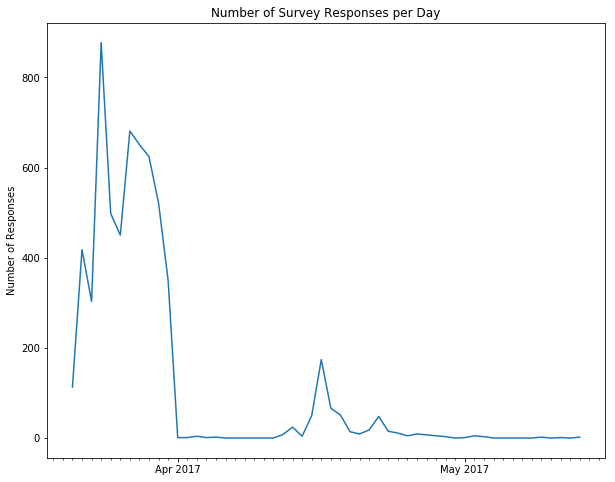

In [36]:
# Used https://matplotlib.org/gallery/text_labels_and_annotations/date.html as a reference
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# set day locator; set month locator and formatter
days = mdates.DayLocator()
months = mdates.MonthLocator()
monthFmt = mdates.DateFormatter('%b %Y')

# create the date plot
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x, y)

# set the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthFmt)
ax.xaxis.set_minor_locator(days)

# add labels
ax.set_title('Number of Survey Responses per Day')
ax.set_ylabel('Number of Responses')

# display the timeline
plt.show()

The resulting timeline shows that the vast majority of responses were received between 21 March and 1 April. This was likely just after the survey was released. Additionally, there is a brief jump in responses received mid-April. This is likely due to a reminder to complete the survey or a second wave of advertisement for the survey.

### Contribution type and frequency

In this section, we will produce two summary tables for grid questions (those with a range of agreement options, interest indications, or frequency of engaging in a certain activity). These responses are formatted into a table and then displayed as a series of bar charts (stacked 2d bar chart and unstacked 3d bar chart).

The first grid question analysed is question 2 in the survey: 

<tt>How often do you engage in the following activities?</tt>
<ul>
    <li>Contribute code (CONTRIBUTOR.TYPE.CONTRIBUTE.CODE)</li>
    <li>Contribute documentation (CONTRIBUTOR.TYPE.CONTRIBUTE.DOCS)</li>
    <li>Maintain a project (CONTRIBUTOR.TYPE.PROJECT.MAINTENANCE)</li>
    <li>Report or document bugs and unexpected behaviours (CONTRIBUTOR.TYPE.FILE.BUGS)</li>
    <li>Offer ideas for new features (CONTRIBUTOR.TYPE.FEATURE.REQUESTS)</li>
    <li>Perform organizational or administrative functions (CONTRIBUTOR.TYPE.COMMUNITY.ADMIN)</li>
</ul>

Answer options are as follows:
<ul>
    <li>Never</li>
    <li>Rarely</li>
    <li>Occasionally</li>
    <li>Frequently</li>
</ul>

In [37]:
# extract the relevant columns from the dataframe, dropping nans
contr_code = df['CONTRIBUTOR.TYPE.CONTRIBUTE.CODE'].dropna()
contr_docs = df['CONTRIBUTOR.TYPE.CONTRIBUTE.DOCS'].dropna()
contr_maint = df['CONTRIBUTOR.TYPE.PROJECT.MAINTENANCE'].dropna()
contr_bugs = df['CONTRIBUTOR.TYPE.FILE.BUGS'].dropna()
contr_reqs = df['CONTRIBUTOR.TYPE.FEATURE.REQUESTS'].dropna()
contr_admin = df['CONTRIBUTOR.TYPE.COMMUNITY.ADMIN'].dropna()

# aggregate the relevant columns in a list to assist iterating across them
contr_types = [contr_code, contr_docs, contr_maint, contr_bugs, contr_reqs, contr_admin]

# possible answers for each contributor.type question
contr_options = ["Never", "Rarely", "Occasionally", "Frequently"]

# creating an empty two dimensional list to hold counts of contr_options for each column in contr_types
c_counts = [[0 for x in range(len(contr_types))] for y in range(len(contr_options))]

# iterate through the different columns of contribution type responses
for i, c_type in enumerate(contr_types):
    # iterate through the responses in each column
    for oft in c_type:
        # increment the counter in the corresponding position of counts according to the response value
        if oft == contr_options[0]: # Never
            c_counts[0][i] += 1
        elif oft == contr_options[1]: # Rarely
            c_counts[1][i] += 1
        elif oft == contr_options[2]: # Occasionally
            c_counts[2][i] += 1
        elif oft == contr_options[3]: # Frequently
            c_counts[3][i] += 1

for i, subList in enumerate(c_counts):
    print (contr_options[i], ":", subList)

Never : [189, 661, 1090, 106, 451, 2412]
Rarely : [1301, 1665, 974, 768, 1346, 867]
Occasionally : [1383, 1214, 944, 2073, 1625, 417]
Frequently : [1160, 460, 996, 1067, 573, 287]


The above code produces a list where the first sublist represents the number of "Never" responses across each contribution type, the second sublist represents the number of "Rarely" responses across each contribution type, and so forth.

Time transform this list of lists into a more readable table!

In [38]:
col_names = ["Code", "Docs", "Maintenance", "File bugs", "Requests", "Admin"]

# creating a blank dataframe as a summary table
contr_sum_df = pd.DataFrame(index = contr_options, columns = col_names)
contr_sum_df = contr_sum_df.fillna(0)

# iterating across the columns (from code to admin)
for i, col in enumerate(col_names):
    # iterating down the rows (from never to frequently)
    for c in range(len(contr_options)):
        # setting the dataframe value according to the count value calculated above
        contr_sum_df.at[contr_options[c], col_names[i]] = c_counts[c][i]

contr_sum_df

,Code,Docs,Maintenance,File bugs,Requests,Admin
Never,189,661,1090,106,451,2412
Rarely,1301,1665,974,768,1346,867
Occasionally,1383,1214,944,2073,1625,417
Frequently,1160,460,996,1067,573,287


Here's the resulting table. While it's easy to pick out that code is the most frequently contributed and administrative functions are least commonly contributed, it's hard to get a full picture of the data. Let's make a stacked bar chart to see if this will further assist analysis.

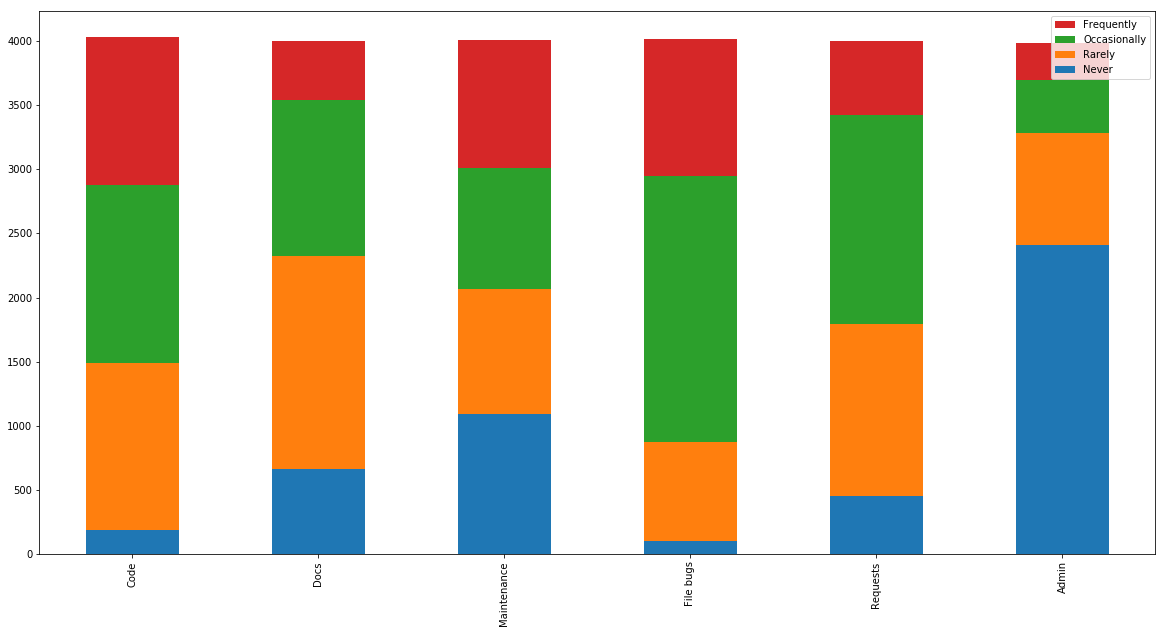

In [39]:
contr_sum_df.T.plot.bar(stacked=True, figsize =(20,10), legend = 'reverse')

This bar chart allows us to see the data trends more intuitively. For example, while more respondents frequently contributed towards code than any other type of contribution, significantly more contributed either frequently or occasionally by filing bugs than code contribution. 

Also, let's consider <tt>frequently or occasionally</tt> together as the active half of the response possibilities, and <tt>rarely or never</tt> as the inactive half of the response possibilities. We can now see that more respondents actively contribute to code and by filing bugs than do not. However, the numbers of respondents who actively contribute to documentation, maintenance, and feature requests are more evenly split between active and inactive.

Notably administrative contributions seem to be quite infrequent overall. This perhaps is a reflection of the users GitHub attracts. As GitHub advertises itself to be "The world's leading software development platform", it most would likely gather users interested in developing software and therefore contributing code. It is therefore could be hypothesized that many of those users who contribute administratively do so in conjunction with other contributions, or were not first attracted to GitHub to participate administratively.

Amusingly, the difference between the active number of contributors to filing bugs versus maintaining code equates to 1200. Out of approximately 4000 respondents, this can be interpreted as users are 30% more users file bugs than maintain bugs. This may be a reflection in human behavior: it is far easier to note (or complain) when something is broken or does not behave as expected, than to fix it. 

Let's now reinterpret the data in a third way: a 3d unstacked bar chart.

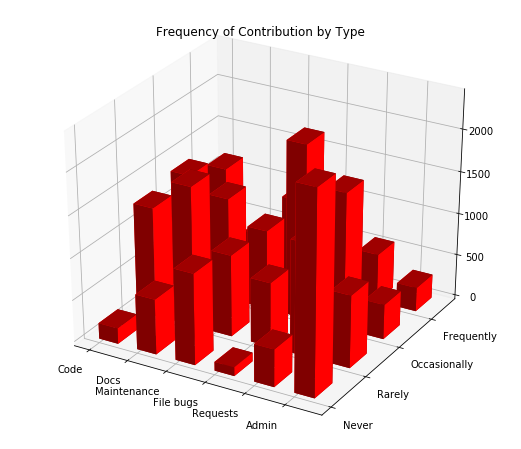

In [40]:
# used https://matplotlib.org/gallery/mplot3d/3d_bars.html as a reference

# import was recommended by matplotlib to make it easier to distinguish between bars.
from mpl_toolkits.mplot3d import Axes3D 

# make the diagram interactive by uncommenting the following line (please note that this will effect all diagrams)
# %matplotlib notebook

# setup the figure and axes
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121, projection='3d')

# setting bar sizes
bottom = 0.5
width = 0.5

# extracting the data from c_counts
for f, freq_list in enumerate(c_counts):
    
    xList = []
    yList = []
    zList = np.zeros(len(freq_list))
    valList = []
    
    for t, val in enumerate(freq_list):
        xList.append(t)
        yList.append(f)
        valList.append(val)
   
    # drawing the diagram for each frequency option at a time (ie. never, rarely, etc.)
    ax.bar3d(xList, yList, zList, bottom, width, valList, color='red', shade=True)

# setting the title and tick labels
ax.set_title('Frequency of Contribution by Type')
plt.xticks(range(len(col_names)), col_names)
plt.yticks(range(len(contr_options)), contr_options)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.setp(ax.yaxis.get_majorticklabels(), ha='left')

plt.show()

In the case of contribution type and frequency, I find the 3D graph interesting to examine and manipulate (with interactive mode on). However, in terms of analysis, I find the 2D stacked version more readible and easier to identify patterns from as you see more of the data at once.

### User and Contributor Priorities

The next two sets of data we are going to walk through these three visualisations with are questions 7 and 8. These questions are as follows:

<tt>When thinking about whether to use open source software, how important are the following things?</tt> and <tt>When thinking about whether to contribute to an open source project, how important are the following things?</tt>

Both questions refer to the same list of "following things", which are:
<ul>
    <li>An open source license (OSS.USER/CONTRIBUTOR.PRIORITIES.LICENSE)</li>
    <li>A code of conduct (OSS.USER/CONTRIBUTOR.PRIORITIES.CODE.OF.CONDUCT)</li>
    <li>A contributing guide (OSS.USER/CONTRIBUTOR.PRIORITIES.CONTRIBUTING.GUIDE)</li>
    <li>A contributor's license agreement (OSS.USER/CONTRIBUTOR.PRIORITIES.CLA)</li>
    <li>Active development (OSS.USER/CONTRIBUTOR.PRIORITIES.ACTIVE.DEVELOPMENT)</li>
    <li>Responsive maintainers (OSS.USER/CONTRIBUTOR.PRIORITIES.RESPONSIVE.MAINTAINERS)</li>
    <li>A welcoming community (OSS.USER/CONTRIBUTOR.PRIORITIES.WELCOMING.COMMUNITY)</li>
    <li>Widespread use (OSS.USER/CONTRIBUTOR.PRIORITIES.WIDESPREAD.USE)</li>
</ul>

Answer options are as follows for both questions as well:
<ul>
    <li>Very important to have</li>
    <li>Somewhat important to have</li>
    <li>Not important either way</li>
    <li>Somewhat important not to have</li>
    <li>Very important not to have</li>
    <li>Don't know what this is</li>
</ul>

As these two questions offer insight into what is important for a user versus a contributor, they will benefit from a joint analysis.

In [41]:
# extract the relevant columns from the dataframe, dropping nulls
oss_u_lic = df['OSS.USER.PRIORITIES.LICENSE'].dropna()
oss_u_code = df['OSS.USER.PRIORITIES.CODE.OF.CONDUCT'].dropna()
oss_u_guide = df['OSS.USER.PRIORITIES.CONTRIBUTING.GUIDE'].dropna()
oss_u_cla = df['OSS.USER.PRIORITIES.CLA'].dropna() # contributor license agreement
oss_u_dev = df['OSS.USER.PRIORITIES.ACTIVE.DEVELOPMENT'].dropna()
oss_u_maint = df['OSS.USER.PRIORITIES.RESPONSIVE.MAINTAINERS'].dropna()
oss_u_welc = df['OSS.USER.PRIORITIES.WELCOMING.COMMUNITY'].dropna()
oss_u_w_use = df['OSS.USER.PRIORITIES.WIDESPREAD.USE'].dropna()

# aggregate the relevant columns in a list to assist iterating across them
oss_u_types = [oss_u_lic, oss_u_code, oss_u_guide, oss_u_cla, oss_u_dev, oss_u_maint, oss_u_welc, oss_u_w_use]

# possible answers for each oss.user.priorities type question
importance_options = ["Very important to have", "Somewhat important to have", "Not important either way",
                     "Somewhat important not to have", "Very important not to have", "Don't know what this is"]

# creating an empty two dimensional list to hold counts of importance_options for each column in oss_u_types
oss_u_counts = [[0 for x in range(len(oss_u_types))] for y in range(len(importance_options))]

# iterate through the different columns of degree-of-importance responses
for i, u_type in enumerate(oss_u_types):
    # iterate through the responses in each column
    for imp in u_type:
        # increment the counter in the corresponding position of counts according to the response value
        if imp == importance_options[0]: # Very important to have
            oss_u_counts[0][i] += 1
        elif imp == importance_options[1]: # Somewhat important to have
            oss_u_counts[1][i] += 1
        elif imp == importance_options[2]: # Not important either way
            oss_u_counts[2][i] += 1
        elif imp == importance_options[3]: # Somewhat important not to have
            oss_u_counts[3][i] += 1
        elif imp == importance_options[4]: # Very important not to have
            oss_u_counts[4][i] += 1
        elif imp == importance_options[5]: # Don't know what this is
            oss_u_counts[5][i] += 1

print("User importance counts\n")
for i, subList in enumerate(oss_u_counts):
    print (importance_options[i], ":", subList)

User importance counts

Very important to have : [2133, 463, 663, 244, 1743, 1654, 1265, 579]
Somewhat important to have : [719, 905, 1220, 601, 1179, 1236, 1217, 1392]
Not important either way : [229, 1446, 1118, 1638, 166, 183, 568, 1038]
Somewhat important not to have : [18, 118, 61, 251, 11, 13, 40, 72]
Very important not to have : [15, 86, 36, 111, 18, 20, 18, 27]
Don't know what this is : [11, 89, 15, 254, 7, 8, 6, 8]


Now, to transform the above data into a table:

In [42]:
oss_u_col_names = ["License", "Code of Conduct", "Guide", "CLA", "Active Dev.", "Maintainers", 
                   "Welcoming", "Widespread"]

# creating a blank dataframe as a summary table
oss_u_sum_df = pd.DataFrame(index = importance_options, columns = oss_u_col_names)
oss_u_sum_df = oss_u_sum_df.fillna(0)

# iterating across the columns (from code to admin)
for i, col in enumerate(oss_u_col_names):
    # iterating down the rows (from never to frequently)
    for c in range(len(importance_options)):
        # setting the dataframe value according to the count value calculated above
        oss_u_sum_df.at[importance_options[c], oss_u_col_names[i]] = oss_u_counts[c][i]

oss_u_sum_df

,License,Code of Conduct,Guide,CLA,Active Dev.,Maintainers,Welcoming,Widespread
Very important to have,2133,463,663,244,1743,1654,1265,579
Somewhat important to have,719,905,1220,601,1179,1236,1217,1392
Not important either way,229,1446,1118,1638,166,183,568,1038
Somewhat important not to have,18,118,61,251,11,13,40,72
Very important not to have,15,86,36,111,18,20,18,27
Don't know what this is,11,89,15,254,7,8,6,8


A precursory gland at the user priorities indicates two interesting trends: 

1. More users considered a license as 'Very important' than any other property.
2. More users didn't know what a CLA (a contributors' license agreement) was than found it very important.

However, it is hard to gain a deeper understanding of how these values represent the users in numeric form. Before creating the visual, let's produce the summary table for contributor priorities. This way, we will be able to compare the visuals for user and contributor priorities side by side.

In [43]:
# extract the relevant columns from the dataframe, dropping nulls
oss_c_lic = df['OSS.CONTRIBUTOR.PRIORITIES.LICENSE'].dropna()
oss_c_code = df['OSS.CONTRIBUTOR.PRIORITIES.CODE.OF.CONDUCT'].dropna()
oss_c_guide = df['OSS.CONTRIBUTOR.PRIORITIES.CONTRIBUTING.GUIDE'].dropna()
oss_c_cla = df['OSS.CONTRIBUTOR.PRIORITIES.CLA'].dropna()
oss_c_dev = df['OSS.CONTRIBUTOR.PRIORITIES.ACTIVE.DEVELOPMENT'].dropna()
oss_c_maint = df['OSS.CONTRIBUTOR.PRIORITIES.RESPONSIVE.MAINTAINERS'].dropna()
oss_c_welc = df['OSS.CONTRIBUTOR.PRIORITIES.WELCOMING.COMMUNITY'].dropna()
oss_c_w_use = df['OSS.CONTRIBUTOR.PRIORITIES.WIDESPREAD.USE'].dropna()

# aggregate the relevant columns in a list to assist iterating across them
oss_c_types = [oss_c_lic, oss_c_code, oss_c_guide, oss_c_cla, oss_c_dev, oss_c_maint, oss_c_welc, oss_c_w_use]

# can reuse the possible answers from oss.user.priorities 

# creating an empty two dimensional list to hold counts of importance_options for each column in oss_u_types
oss_c_counts = [[0 for x in range(len(oss_c_types))] for y in range(len(importance_options))]

# iterate through the different columns of degree-of-importance responses
for i, co_type in enumerate(oss_c_types):
    # iterate through the responses in each column
    for imp in co_type:
        # increment the counter in the corresponding position of counts according to the response value
        if imp == importance_options[0]: # Very important to have
            oss_c_counts[0][i] += 1
        elif imp == importance_options[1]: # Somewhat important to have
            oss_c_counts[1][i] += 1
        elif imp == importance_options[2]: # Not important either way
            oss_c_counts[2][i] += 1
        elif imp == importance_options[3]: # Somewhat important not to have
            oss_c_counts[3][i] += 1
        elif imp == importance_options[4]: # Very important not to have
            oss_c_counts[4][i] += 1
        elif imp == importance_options[5]: # Don't know what this is
            oss_c_counts[5][i] += 1

print("Contributor importance counts\n")
for i, subList in enumerate(oss_c_counts):
    print (importance_options[i], ":", subList)

Contributor importance counts

Very important to have : [2199, 655, 1198, 419, 1368, 1994, 1533, 387]
Somewhat important to have : [610, 1145, 1396, 712, 1333, 1022, 1199, 1016]
Not important either way : [337, 1085, 500, 1266, 448, 138, 411, 1666]
Somewhat important not to have : [16, 119, 41, 327, 21, 7, 21, 70]
Very important not to have : [15, 84, 18, 166, 18, 16, 15, 30]
Don't know what this is : [18, 96, 24, 280, 5, 7, 7, 12]


Now, to transform the above data into a table:

In [44]:
# can reuse oss_u_col_names here
oss_c_col_names = oss_u_col_names

# creating a blank dataframe as a summary table
oss_c_sum_df = pd.DataFrame(index = importance_options, columns = oss_c_col_names)
oss_c_sum_df = oss_c_sum_df.fillna(0)

# iterating across the columns (from code to admin)
for i, col in enumerate(oss_c_col_names):
    # iterating down the rows (from never to frequently)
    for c in range(len(importance_options)):
        # setting the dataframe value according to the count value calculated above
        oss_c_sum_df.at[importance_options[c], oss_c_col_names[i]] = oss_c_counts[c][i]

oss_c_sum_df

,License,Code of Conduct,Guide,CLA,Active Dev.,Maintainers,Welcoming,Widespread
Very important to have,2199,655,1198,419,1368,1994,1533,387
Somewhat important to have,610,1145,1396,712,1333,1022,1199,1016
Not important either way,337,1085,500,1266,448,138,411,1666
Somewhat important not to have,16,119,41,327,21,7,21,70
Very important not to have,15,84,18,166,18,16,15,30
Don't know what this is,18,96,24,280,5,7,7,12


Again, this table indicates several wider trends about contributors:

1. Like users, the property that most respondents found very important was an open source license.
2. The largest group of contributors were ambivalent towards whether or not there was widespread use of the project. 

However, to gain a more cohesive understanding of the data, let's create a visual representation.

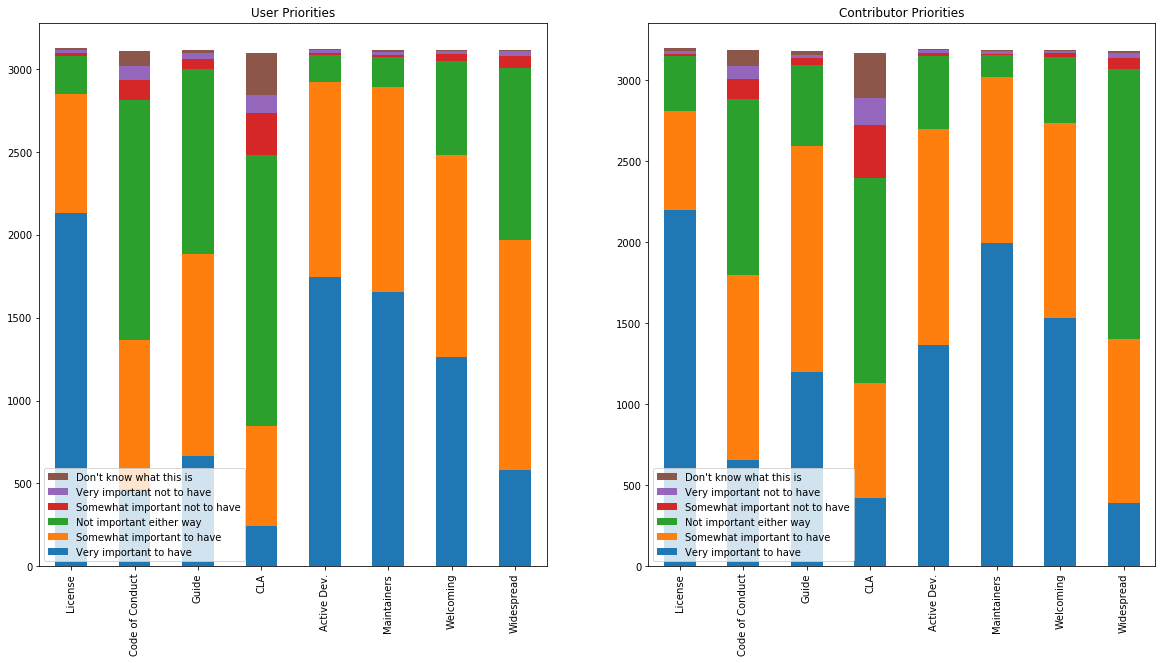

In [45]:
#set figure
fig, axes = plt.subplots(nrows=1, ncols=2)

oss_user_title = "User Priorities"
oss_contr_title = "Contributor Priorities"

oss_u_sum_df.T.plot.bar(ax=axes[0],stacked=True, figsize=(20,10), title = oss_user_title, legend = 'reverse')
oss_c_sum_df.T.plot.bar(ax=axes[1],stacked=True, figsize=(20,10), title = oss_contr_title, legend = 'reverse')

From the above visualizations, we can make the following observations:

1. Both users and contributors prioritized an open source license as very important. This is likely as an open source license "allow[s] software to be freely used, modified, and shared" (according to opensource.org/licenses). Without an open source license, many GitHub users would likely not be able to access and interact with others' work.

2. Looking into features that are positively important (somewhat important and very important to have: orange and blue in the diagrams), there is a discrepancy between users a contributors. Here it is evident that most users found active development very important to have, whereas most contributors found responsive maintainers very important to have. 

3. On the other hand, let's look into negative importance (somewhat important and very important NOT to have: red and purple in the diagram). While negative importance was a significantly less frequent response, one feature had a notable number of negative importance responses: CLA (contributor license agreement). This feature was also the most frequently "unknown" feature. According to clahub.com/pages/why_cla, a contributor license agreement legally defines which contributors were permitted to make contributions, states that contributors agree to the distribution of their work, and prevents contributors from revoking their permission for distribution. Therefore, CLAs most likely received this negative attention from respondents as they make contribution more difficult and could potentially slow progress on a project. 

4. The vast majority of responses across the users and contributors indicate positive importance or ambivalence. This suggests that GitHub has been developing with its users and contributors needs over its lifetime. As there are no major "red flags" (somewhat or very important NOT to have) for any of the above features often present in GitHub projects, this indicates an overall positive response from respondents.

Now, let's see if a different visual will offer any deeper insight into the priorities of users and contributors.

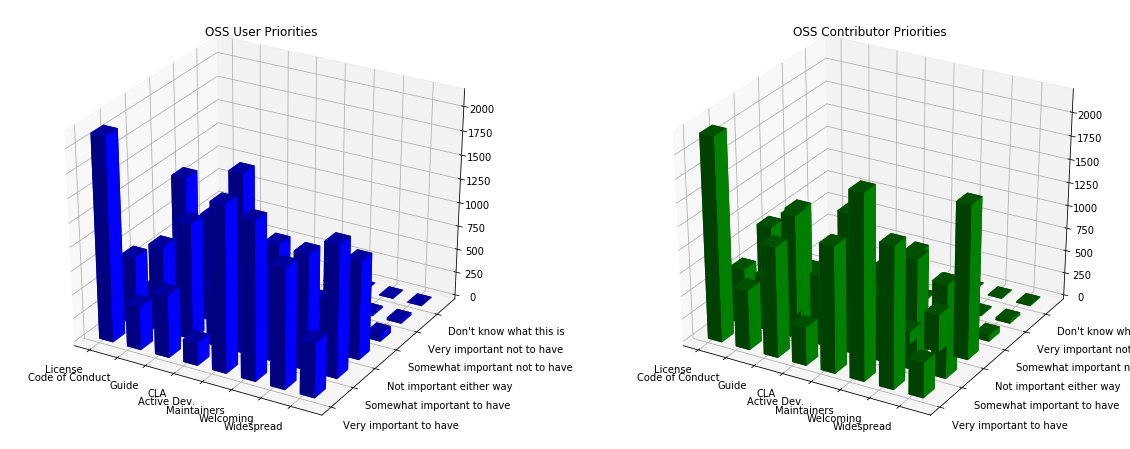

In [46]:
# used https://matplotlib.org/gallery/mplot3d/3d_bars.html as a reference

# make the diagram interactive by uncommenting the following line (please note that this will effect all diagrams)
# %matplotlib notebook

# setup the figure and axes
fig = plt.figure(figsize=(20, 8))
user_priorites = fig.add_subplot(121, projection='3d')
contr_priorites = fig.add_subplot(122, projection='3d')

# setting bar sizes
bottom = 0.5
width = 0.5

# extracting the data from c_counts for user priorities
for i, imp_list in enumerate(oss_u_counts):
    
    xList = []
    yList = []
    zList = np.zeros(len(imp_list))
    valList = []
    
    for t, val in enumerate(imp_list):
        xList.append(t)
        yList.append(i)
        valList.append(val)
   
    # drawing the diagram for each frequency option at a time (ie. never, rarely, etc.)
    user_priorites.bar3d(xList, yList, zList, bottom, width, valList, color='blue', shade=True)
    
# extracting the data from c_counts for contributor priorities
for i, imp_list in enumerate(oss_c_counts):
    
    xList = []
    yList = []
    zList = np.zeros(len(imp_list))
    valList = []
    
    for t, val in enumerate(imp_list):
        xList.append(t)
        yList.append(i)
        valList.append(val)
   
    # drawing the diagram for each importance option at a time (ie. very important, etc.)
    contr_priorites.bar3d(xList, yList, zList, bottom, width, valList, color='green', shade=True)

# setting the title for each diagram
user_priorites.set_title('OSS User Priorities')
contr_priorites.set_title('OSS Contributor Priorities')

# setting the tick labels for user priorities and adjusting their alignment
user_priorites.set_xticklabels(oss_u_col_names)
user_priorites.set_yticklabels(importance_options)
plt.setp(user_priorites.xaxis.get_majorticklabels(), ha='right')
plt.setp(user_priorites.yaxis.get_majorticklabels(), ha='left')

# setting the tick labels for contributor priorities and adjusting their alignment
contr_priorites.set_xticklabels(oss_c_col_names)
contr_priorites.set_yticklabels(importance_options)
plt.setp(contr_priorites.xaxis.get_majorticklabels(), ha='right')
plt.setp(contr_priorites.yaxis.get_majorticklabels(), ha='left')

plt.show()

Ultimately, I find the previous plot (stacked 2D) more informative that the 3D unstacked bar chart. While it is possible to scroll through the above plots, it is harder to see all of the data at once. Additionally, while in interactive mode, it is difficult to view and compare both the user and contributor priorities at the same time.

### Employment and Those who Contribute to Open Source Development

Let's see if the employment status of the respondents impacts their likelihood to contribute to open source projects. This analysis will bring together the following questions:

<tt>People participate in open source in different ways. Which of the following activities do you engage in? Choose all that apply.</tt> with an answer of <tt>Participate in open source software development (including making feature requests, filing bugs, contribution of documentation or code, project maintenance, etc.)</tt> and <tt>Which best describes your employment (paid work) status?</tt>

Answer options for employment status:
<ul>
    <li>Employed full time</li>
    <li>Employed part time</li>
    <li>Full time student</li>
    <li>Temporarily not working</li>
    <li>Retired or permanently not working (e.g. due to disability)</li>
    <li>Other - please describe</li>
</ul>

Let's see how this data comes together:

In [47]:
# extract the relevant columns from the dataframe, dropping nulls
emp_part_df = df[["EMPLOYMENT.STATUS", "PARTICIPATION.TYPE.CONTRIBUTE"]].dropna()
emp_part = pd.crosstab(emp_part_df["EMPLOYMENT.STATUS"], emp_part_df["PARTICIPATION.TYPE.CONTRIBUTE"])
emp_part

PARTICIPATION.TYPE.CONTRIBUTE,0,1
EMPLOYMENT.STATUS,,
Employed full time,924,2691
Employed part time,114,235
Full time student,366,682
Other - please describe,48,136
Retired or permanently not working (e.g. due to disability),36,54
Temporarily not working,131,183


From the above diagram, the following observations can be made:

1. The vast majority of respondents who answered both these questions are employed full time, with the second leading group being full time students.
2. There are more respondents who do contribute than do not across all groups.
3. As there is a large discrepency in the number of responses between those who are employed full time and those with different employment statuses, it is necessary to calculate a percentage of respondents who contribute from each group.

Let's calculate and plot the percentage of those who contribute by their employment status:

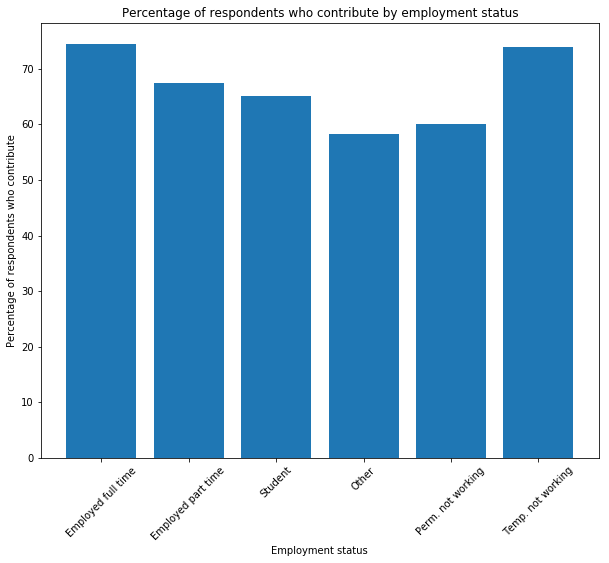

In [48]:
# extract the relevant data for each group from the above crosstab dataframe
ft_contr = emp_part[1][0]
tot_ft = ft_contr + emp_part[0][0]
pt_contr = emp_part[1][1]
tot_pt = pt_contr + emp_part[0][1]
sd_contr = emp_part[1][2]
tot_sd = sd_contr + emp_part[0][2]
ot_contr = emp_part[1][3]
tot_ot = ot_contr + emp_part[0][3]
nw_contr = emp_part[1][4]
tot_nw = nw_contr + emp_part[0][4]
tn_contr = emp_part[1][5]
tot_tn = tn_contr + emp_part[0][5]

# calculate the percentage of respondents who contribute by employment status
p_c_ft = percentage(ft_contr, tot_ft)
p_c_pt = percentage(pt_contr, tot_pt)
p_c_sd = percentage(sd_contr, tot_sd)
p_c_tn = percentage(tn_contr, tot_tn)
p_c_nw = percentage(nw_contr, tot_nw)
p_c_ot = percentage(ot_contr, tot_ot)

# generate the bar chart 
perc_contr_emp = [p_c_ft, p_c_pt, p_c_sd, p_c_tn, p_c_nw, p_c_ot]
labels = ["Employed full time", "Employed part time", "Student", "Other", "Perm. not working", "Temp. not working"]

# create the date plot
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(range(len(perc_contr_emp)), perc_contr_emp)

# add labels
ax.set_title('Percentage of respondents who contribute by employment status')
ax.set_xlabel('Employment status')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel('Percentage of respondents who contribute')

# display the timeline
plt.show()

The above bar chart shows that those respondents who are employed full time or are temporarily not working are most likely to be contributing to open source development. The data above is surprising to me, as I would have expected those who spend less time at work (such as those who are students, employed part time, permanently not working, or have selected other) to be more likely to contribute. However, the opposite seems to be true except for those who are temporarily not working. 

### Are those who first accessed computers younger more likely to contribute?

Let's now see if the age respondents were first exposed to computers with internet impacted their likelihood to contribute on GitHub. The question in the survey was as follow:

<tt>How old were you when you first had regular access to a computer with internet connection?</tt>

The answer choices:
<ul>
    <li>Younger than 13 years old</li>
    <li>13 - 17 years old</li>
    <li>18 - 24 years old</li>
    <li>25 - 45 years old</li>
    <li>Older than 45 years old</li>
</ul>

Let's produce a table to get a rough idea of the data:

In [49]:
# extract the relevant columns from the dataframe, dropping nulls
contr_first_comp_df = df[["AGE.AT.FIRST.COMPUTER.INTERNET", "PARTICIPATION.TYPE.CONTRIBUTE"]].dropna()
contr_first_comp = pd.crosstab(contr_first_comp_df["AGE.AT.FIRST.COMPUTER.INTERNET"], 
                               contr_first_comp_df["PARTICIPATION.TYPE.CONTRIBUTE"])
contr_first_comp

PARTICIPATION.TYPE.CONTRIBUTE,0,1
AGE.AT.FIRST.COMPUTER.INTERNET,,
13 - 17 years old,331,982
18 - 24 years old,184,511
25 - 45 years old,84,118
Older than 45 years old,13,10
Younger than 13 years old,354,1124


From the data above, it is immediately clear that there are far more respondents who were first exposed to computers with internet at a younger age. This means we will need to scale the percentage of those who contribute against their own age group (ie. of respondents with first access between ages 13-17, what percentage contribute?).

Let's produce a visual to get a better understanding of the figures above:

Under 13: 76.05   13-17: 74.79   18-24: 73.53
25-45: 58.42   Over 45: 43.48


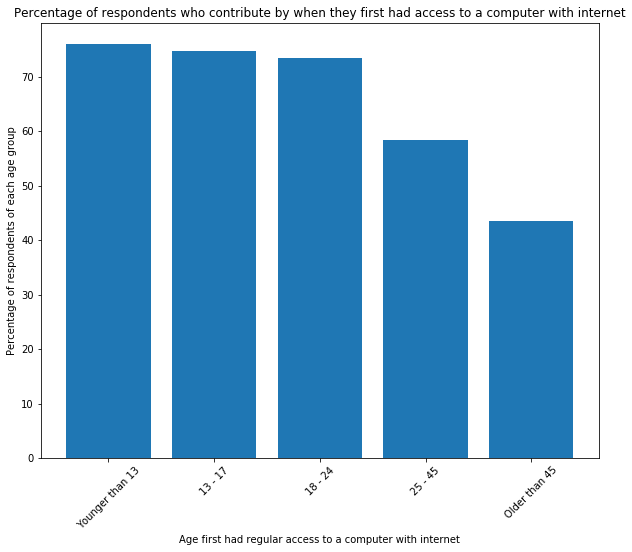

In [50]:
# calculate the percentage of respondents who contribute grouped by the age they first had regular access to 
# a computer with internet
len_u_13 = len(df.loc[(df['AGE.AT.FIRST.COMPUTER.INTERNET'] == 'Younger than 13 years old') 
                      & (df['PARTICIPATION.TYPE.CONTRIBUTE'] == 1)])
tot_u_13 = len_u_13 + len(df.loc[(df['AGE.AT.FIRST.COMPUTER.INTERNET'] == 'Younger than 13 years old') 
                      & (df['PARTICIPATION.TYPE.CONTRIBUTE'] == 0)])

len_13_17 = len(df.loc[(df['AGE.AT.FIRST.COMPUTER.INTERNET'] == '13 - 17 years old') 
                      & (df['PARTICIPATION.TYPE.CONTRIBUTE'] == 1)])
tot_u_17 = len_13_17 + len(df.loc[(df['AGE.AT.FIRST.COMPUTER.INTERNET'] == '13 - 17 years old') 
                      & (df['PARTICIPATION.TYPE.CONTRIBUTE'] == 0)])

len_18_24 = len(df.loc[(df['AGE.AT.FIRST.COMPUTER.INTERNET'] == '18 - 24 years old') 
                      & (df['PARTICIPATION.TYPE.CONTRIBUTE'] == 1)])
tot_u_24 = len_18_24 + len(df.loc[(df['AGE.AT.FIRST.COMPUTER.INTERNET'] == '18 - 24 years old') 
                      & (df['PARTICIPATION.TYPE.CONTRIBUTE'] == 0)])

len_25_45 = len(df.loc[(df['AGE.AT.FIRST.COMPUTER.INTERNET'] == '25 - 45 years old') 
                      & (df['PARTICIPATION.TYPE.CONTRIBUTE'] == 1)])
tot_u_45 = len_25_45 + len(df.loc[(df['AGE.AT.FIRST.COMPUTER.INTERNET'] == '25 - 45 years old') 
                      & (df['PARTICIPATION.TYPE.CONTRIBUTE'] == 0)])

len_o_45 = len(df.loc[(df['AGE.AT.FIRST.COMPUTER.INTERNET'] == 'Older than 45 years old') 
                      & (df['PARTICIPATION.TYPE.CONTRIBUTE'] == 1)])
tot_o_45 = len_o_45 + len(df.loc[(df['AGE.AT.FIRST.COMPUTER.INTERNET'] == 'Older than 45 years old') 
                      & (df['PARTICIPATION.TYPE.CONTRIBUTE'] == 0)])

p_u_13 = percentage(len_u_13, tot_u_13)
p_u_17 = percentage(len_13_17, tot_u_17)
p_u_24 = percentage(len_18_24, tot_u_24)
p_u_45 = percentage(len_25_45, tot_u_45)
p_o_45 = percentage(len_o_45, tot_o_45)

print("Under 13: %.2f   13-17: %.2f   18-24: %.2f" % (p_u_13, p_u_17, p_u_24))
print("25-45: %.2f   Over 45: %.2f" % (p_u_45, p_o_45))

perc_contr_f_age = [p_u_13, p_u_17, p_u_24, p_u_45, p_o_45]
labels = ["Younger than 13", "13 - 17", "18 - 24", "25 - 45", "Older than 45"]

# create the date plot
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(range(len(perc_contr_f_age)), perc_contr_f_age)

# add labels
ax.set_title('Percentage of respondents who contribute by when they first had access to a computer with internet')
ax.set_xlabel('Age first had regular access to a computer with internet')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel('Percentage of respondents of each age group')

# display the timeline
plt.show()

The above chart displays that respondents who were first exposed to a computer with internet access younger are more likely to contribute on GitHub. Across the groups who first had regular access younger (under 13, 13-17 and 18-24), the youngest group was only 2.52% more likely to contribute than those with first regular access between 18-24. However, the older two age groups (25-45 and over 45) were considerably less likely to contribute: each step in age group decreases likelihood of contribution by approximately 15%. 

Several speculations are that perhaps the respondents who were exposed later have had less time to learn the necessary skills for contribution or that perhaps the respondents exposed later are interested in participating through GitHub in ways other than contributing (for example following or using open source applications). Without further information, however, it is difficult to determine with certainty why the groups first exposed at an older age are less likely to contribute.

### Gender and Gender Identity

Next is an analysis of all of the respondents gender identity. To determine the gender demographics of those who responded to the survey, we will look into the two following questions:

<tt>What is your gender?</tt> and <tt>Do you identify as transgender?</tt>

The answer choices for the first question are:
<ul>
    <li>Man</li>
    <li>Woman</li>
    <li>Non-binary or Other</li>
    <li>Prefer not to say</li>
</ul>

And for the second question:
<ul>
    <li>No</li>
    <li>Yes</li>
    <li>Not sure</li>
    <li>Prefer not to say</li>
</ul>

Let's produce a table:

In [51]:
ge_df = df[["GENDER", "TRANSGENDER.IDENTITY"]].dropna()
ge_sort = pd.crosstab(ge_df["GENDER"], ge_df["TRANSGENDER.IDENTITY"])
ge_sort

TRANSGENDER.IDENTITY,No,Not sure,Prefer not to say,Yes
GENDER,,,,
Man,3336,16,13,12
Non-binary or Other,17,11,3,8
Prefer not to say,28,1,142,1
Woman,111,2,0,12


The total answers to these questions is surprisingly low. This is likely due to the fact that these questions were near the end of the survey (44 and 45 of 52 questions). As can be seen in this table, the vast majority of respondents were cisgender (those who identify as their birth gender) men. Let's calculate the exact percent:

In [52]:
gender = ge_df.groupby('GENDER')

ge_tot = len(ge_df) # total
len_cis_man = ge_sort.at['Man', 'No'] # cis men
per_cis_man = percentage(len_cis_man, ge_tot)

print("Respondents who are cisgender men: {0:.2f}%".format(per_cis_man))

Respondents who are cisgender men: 89.85%


This is a surprisingly high percentage of respondents who identify as cisgender men. This lack of gender and gender identity diversity is possibly the most surprising result to me, as I thought gender representation was more balanced.

Another interesting aspect of this data is the transgender identity of those who identify as non-binary. In the first table, 39 respondents identify as non-binary or other in gender. Of these 39, 17 do not identify as transgender and 8 do. This is a surprising statistic to me, as I had previously considered non-binary gender identities to be considered explicitly under the umbrella of transgender identities. This data proves that not only is this not the case, but more of the (admittedly small sample size) respondents consider themselves to be not transgender.

### Gender and sexual orientation

Building on the previous analysis of gender, let's now analyse the sexual orientation in terms of gender of respondents. The same data from the previous question on gender will be used here along with the following question:

<tt>Do you identify as gay, lesbian, bisexual, asexual or any other minority sexual orientation?</tt>

The answer choices are as follows:
<ul>
    <li>Yes</li>
    <li>No</li>
    <li>Not sure</li>
    <li>Prefer not to say</li>
</ul>

Let's produce another table:

In [53]:
df.groupby("GENDER")["SEXUAL.ORIENTATION"].describe()

,count,unique,top,freq
GENDER,,,,
Man,3380,4,No,3071
Non-binary or Other,39,4,Yes,29
Prefer not to say,173,4,Prefer not to say,143
Woman,125,4,No,84


This first table displays the number of men, women, non-binary or other & respondents who prefer not to identify their gender crossed sexual orientation. Now that we have the total count of respondents of each gender and dominating group of sexual orientation, let's look more into the breakdown of the population:

In [54]:
# so for sexual orientation
so_df = df[["GENDER", "SEXUAL.ORIENTATION"]]
so_table = pd.crosstab(so_df["GENDER"], so_df["SEXUAL.ORIENTATION"])
so_table

SEXUAL.ORIENTATION,No,Not sure,Prefer not to say,Yes
GENDER,,,,
Man,3071,72,55,182
Non-binary or Other,6,3,1,29
Prefer not to say,24,1,143,5
Woman,84,9,2,30


This chart shows us that once again there is a single leading demographic that is very highly represented among respondents: men who do not identify as a sexual minority. There is, however, a slightly weaker dominance of this group. Let's calculate the exact percentage of respondents of each group:

In [55]:
so = so_df.groupby('GENDER')

# total
so_tot = len(so_df.dropna())

# straight (ie. not a minority sexual orientation) men
len_straight_man = so_table.at['Man', 'No'] 
per_straight_man = percentage(len_straight_man, so_tot)
print("Respondents who are straight men: {0:.2f}%".format(per_straight_man))

# straight (ie. not a minority sexual orientation) women
len_straight_woman = so_table.at['Woman', 'No'] 
per_straight_woman = percentage(len_straight_woman, so_tot)
print("Respondents who are straight women: {0:.2f}%".format(per_straight_woman))

# straight (ie. not a minority sexual orientation) non-binary / other
len_straight_nbo = so_table.at['Non-binary  or Other', 'No'] 
per_straight_nbo = percentage(len_straight_nbo, so_tot)
print("Respondents who are straight non-binary or other gender: {0:.2f}%\n".format(per_straight_nbo))

# minority sexual orientation men
len_min_so_man = so_table.at['Man', 'Yes'] 
per_min_so_man = percentage(len_min_so_man, so_tot)
print("Respondents who are minority sexual orientation men: {0:.2f}%".format(per_min_so_man))

# minority sexual orientation women
len_min_so_woman = so_table.at['Woman', 'Yes']
per_min_so_woman = percentage(len_min_so_woman, so_tot)
print("Respondents who are minority sexual orientation women: {0:.2f}%".format(per_min_so_woman))

# minority sexual orientation non-binary / other
len_min_so_nbo = so_table.at['Non-binary  or Other', 'Yes'] 
per_min_so_nbo = percentage(len_min_so_nbo, so_tot)
print("Respondents who are minority sexual orientation non-binary or other gender: {0:.2f}%\n".format(per_min_so_nbo))

# total counts of men and women
men_count = so.count().at['Man', 'SEXUAL.ORIENTATION']
women_count = so.count().at['Man', 'SEXUAL.ORIENTATION']

# total counts of minority sexual orientation men and women
msom_count = so_table.at['Man', 'Yes']
wsom_count = so_table.at['Woman', 'Yes']

msom_percent = percentage(msom_count, men_count)
wsom_percent = percentage(wsom_count, women_count)

print("Percentage of male respondents who identify as a minority sexual orientation: {0:.2f}%".format(msom_percent))
print("Percentage of female respondents who identify as a minority sexual orientation: {0:.2f}%".format(wsom_count))

Respondents who are straight men: 82.62%
Respondents who are straight women: 2.26%
Respondents who are straight non-binary or other gender: 0.16%

Respondents who are minority sexual orientation men: 4.90%
Respondents who are minority sexual orientation women: 0.81%
Respondents who are minority sexual orientation non-binary or other gender: 0.78%

Percentage of male respondents who identify as a minority sexual orientation: 5.38%
Percentage of female respondents who identify as a minority sexual orientation: 30.00%


Again the proportion of straight men is very large. Let's compare the data from GitHub respondents to that of the UK Office for National Statistics (an overview provided at: https://www.ons.gov.uk/peoplepopulationandcommunity/culturalidentity/sexuality/bulletins/sexualidentityuk/2017). While the GitHub survey was not directed exclusively at British users, we can use the United Kingdom's population as a comparison.

The relevant key points made by the UK Office for National Statistics are as follows:
<ul>
    <li>In 2017, 93.2% of the UK population aged 16 years and older identified as heterosexual.</li>
    <li>2.3% of British males and 1.8% of British females identify os LGB in 2017.</li>
</ul>

The comparable statistics from the GitHub survey respondents are as follows:
<ul>
    <li>84.9% of the respondents identify as heterosexual (total non-minority sexual orientation / total respondents to above questions).</li>
    <li>5.38% of male respondents and 24% of females respondents identify as a minority sexual orientation.</li>
</ul>

This comparison is vital in understanding the data. Ideally, the data gathered from GitHub respondents should be compared on a global scale (as GitHub is a global community); however, accurate data of this nature is difficult to obtain. Even with a direct comparison to the population of the UK, it is possible to make the following observations:

1. The population of GitHub users who responded to the survey is slightly more diverse than that of the UK.
2. Female respondents are far more diverse in sexual orientation than those of the UK population.
3. Curiously, the number of male respondents of a minory sexual orientation is larger than the number of female respondents of all sexual orientations.

It is difficult to hypothesize as to why the GitHub population's sexual diversity is significantly greater than that of the UK. Potentially, this could be a reflection of the comparitively small sample size of respondents; however, there is no further data to extrapolate further.

### Employment and formal education

Lastly, let's take a look at the highest level of formal education received and employment status.

The questions were as follows:
<tt>What is the highest level of formal education that you have completed?</tt> and <tt>Which best describes your employment (paid work) status?</tt>

The answer choices for education are as follows:
<ul>
    <li>Less than secondary (high) school</li>
    <li>Secondary (high) school graduate or equivalent</li>
    <li>Some college, no degree</li>
    <li>Vocational/trade program or apprenticeship</li>
    <li>Bachelor's degree</li>
    <li>Master's degree</li>
    <li>Doctorate (Ph.D.) or other advanced degree (e.g. M.D., J.D.)</li>
</ul>

And for employment:
<ul>
    <li>Employed full time</li>
    <li>Employed part time</li>
    <li>Full time student</li>
    <li>Temporarily not working</li>
    <li>Retired or permanently not working (e.g. due to disability)</li>
    <li>Other</li>
</ul>

Let's produce a final table:

In [56]:
edu_df = df[["FORMAL.EDUCATION", "EMPLOYMENT.STATUS"]]
edu_table = pd.crosstab(edu_df["FORMAL.EDUCATION"], edu_df["EMPLOYMENT.STATUS"])
edu_table

EMPLOYMENT.STATUS,Employed full time,Employed part time,Full time student,Other - please describe,Retired or permanently not working (e.g. due to disability),Temporarily not working
FORMAL.EDUCATION,,,,,,
Bachelor's degree,961,72,172,30,17,67
"Doctorate (Ph.D.) or other advanced degree (e.g. M.D., J.D.)",203,20,4,4,13,12
Less than secondary (high) school,20,3,81,7,2,12
Master's degree,677,34,60,37,9,35
Secondary (high) school graduate or equivalent,101,25,193,20,6,29
"Some college, no degree",353,56,136,28,13,53
Vocational/trade program or apprenticeship,79,10,16,5,8,9


Reviewing the above table, it becomes clear that across the most frequent employment status of respondents is <tt>employed full time</tt> with two notable exceptions: <tt>less than secondary (high) school</tt> and <tt>secondary (high) school graduate or equivalent</tt>. These two categories both have the most frequent response of <tt>full time student</tt>, which is logical as respondents from these groups are most likely still in secondary school or university. Let's calculate some statistics to get a better understanding of the state above.

In [57]:
edu = edu_df.groupby("FORMAL.EDUCATION")

bsc_count = edu.count().at['Bachelor\'s degree', 'EMPLOYMENT.STATUS'] # note that bsc is just a var name,
msc_count = edu.count().at['Master\'s degree', 'EMPLOYMENT.STATUS'] # they might have other types of degrees
phd_count = edu.count().at['Doctorate (Ph.D.) or other advanced degree (e.g. M.D., J.D.)', 'EMPLOYMENT.STATUS']
ged_count = edu.count().at['Secondary (high) school graduate or equivalent', 'EMPLOYMENT.STATUS']
nod_count = edu.count().at['Some college, no degree', 'EMPLOYMENT.STATUS']
noh_count = edu.count().at['Less than secondary (high) school', 'EMPLOYMENT.STATUS']
voc_count = edu.count().at['Vocational/trade program or apprenticeship', 'EMPLOYMENT.STATUS']

bsc_full_count = edu_table.at['Bachelor\'s degree', 'Employed full time']
msc_full_count = edu_table.at['Master\'s degree', 'Employed full time']
phd_full_count = edu_table.at['Doctorate (Ph.D.) or other advanced degree (e.g. M.D., J.D.)', 'Employed full time']
ged_full_count = edu_table.at['Secondary (high) school graduate or equivalent', 'Employed full time']
nod_full_count = edu_table.at['Some college, no degree', 'Employed full time']
noh_full_count = edu_table.at['Less than secondary (high) school', 'Employed full time']
voc_full_count = edu_table.at['Vocational/trade program or apprenticeship', 'Employed full time']

bsc_percent = percentage(bsc_full_count, bsc_count)
msc_percent = percentage(msc_full_count, msc_count)
phd_percent = percentage(phd_full_count, phd_count)
ged_percent = percentage(ged_full_count, ged_count)
nod_percent = percentage(nod_full_count, nod_count)
noh_percent = percentage(noh_full_count, noh_count)
voc_percent = percentage(voc_full_count, voc_count)

print("Percentage of Doctorate (or similar) holders who are employed full time: {0:.2f}%".format(phd_percent))
print("Percentage of Master's degree holders who are employed full time: {0:.2f}%".format(msc_percent))
print("Percentage of Bachelor's degree holders who are employed full time: {0:.2f}%".format(bsc_percent))
print("Percentage of those who apprenticed or went to trade school who are employed full time: {0:.2f}%\n".format(voc_percent))
print("Percentage of those who attended college but did not obtain a degree who are employed full time: {0:.2f}%".format(nod_percent))
print("Percentage of GED (or equivalent) holders who are employed full time: {0:.2f}%".format(ged_percent))
print("Percentage of those who did not complete secondary school who are employed full time: {0:.2f}%".format(noh_percent))

Percentage of Doctorate (or similar) holders who are employed full time: 79.30%
Percentage of Master's degree holders who are employed full time: 79.46%
Percentage of Bachelor's degree holders who are employed full time: 72.86%
Percentage of those who apprenticed or went to trade school who are employed full time: 62.20%

Percentage of those who attended college but did not obtain a degree who are employed full time: 55.24%
Percentage of GED (or equivalent) holders who are employed full time: 27.01%
Percentage of those who did not complete secondary school who are employed full time: 16.00%


The above print out statements have been divided into two groups: completed higher education (above), and have not (below). Interestingly, as the difficulty of obtaining a degree increases, so does the percentage of those with that degree classification who are employed full time. In other words, a doctorate is harder to achieve than a GED (high school diploma); likewise, those respondents who have obtained a doctorate are more likely to be employed full time than those who have only obtained their GED.

Let's make a more informative display of the statistics above.

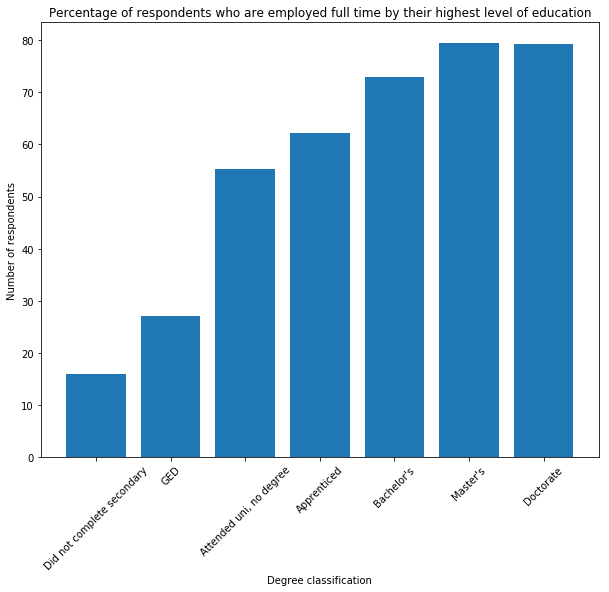

In [58]:
# create a list of the percentage of respondents who are employed full time by highest level of education
perc_f_emp_by_degree = [noh_percent, ged_percent, nod_percent, voc_percent,
                        bsc_percent, msc_percent, phd_percent]
labels = ["Did not complete secondary", "GED", "Attended uni, no degree", 
          "Apprenticed", "Bachelor's", "Master's", "Doctorate"]

# create the date plot
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(range(len(perc_f_emp_by_degree)), perc_f_emp_by_degree)

# add labels
ax.set_title('Percentage of respondents who are employed full time by their highest level of education')
ax.set_xlabel('Degree classification')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel('Number of respondents')

# display the timeline
plt.show()

The above bar graph clearly displays a trend: the more education a respondent has completed, the more likley they are to be employed full time. In conclusion, this suggests that parents are making a smart and informed decision when urging their children to attend university.

## Conclusion

With more time, we would have liked to have analysed the additional data set on negative incidents. Additionally, if we had more time, producing a parser for the questionnaire logic would have greatly improved the reusability of this notebook.

### A Note on Reproducibility and Reusability

The data produced in the above notebook should be reproducible so long as all dependencies are met. Unfortunately, as we did not have time to develop a questionnaire logic parser, the cleaning and refinement process is not fully reusable. Assuming a similar set of data with the same column names exists, the data analysis would be runnable on that set as well (as we avoided directly accessing a cell by an absolute index).

### A Note on Contribution and Code Provenance

All code adapted from outside resources has a link to the page from which the original code was taken. We have only adapted code in the instance of generating diagrams.

The division of work for this project is more difficult to break down absolutely. Original allocations were as follows: 170005146 was to complete the descriptive analysis section of the basic specifications and any extensions they were interested in. 170000801 was to complete the data refinement and produce the diagrams for the basic specification and any additional extensions not already completed by 170005146. Ultimately, the extensions ended up being a joint effort and 170000801 wrote the analyses and integrated report.